# EPA Ireland Archive of Nitrogen Oxides Monitoring Data
Nitrogen oxides includes the two pollutants nitric oxide (NO) and nitrogen dioxide (NO2). Power-generation plants and motor vehicles are the principal sources of NOx, through high temperature combustion. NOx contributes to the formation of acid rain and is also a recognised ozone precursor. 

Short-term exposure to NO2 is associated with reduced lung function and airway responsiveness, and increased reactivity to natural allergens. Long-term exposure is associated with increased risk of respiratory infection in children. 
CAFE Directive 2008/50/EC established an hourly limit of 200 μg/m3 and an annual mean limit of 40 μg/m3 in respect of NO2. No more than 18 exceedances of the hourly limit values are allowed per year. Both limit values come into force on 1 January 2010.

In [1]:
#import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data2=pd.read_csv('Mayo_Castlebar_2018_ugm3_hr.csv', header=None, skiprows=1,names=['Date','Hour','NOx','NO','NO2'])
#data2=pd.DataFrame([d], )
data2= data2.dropna(axis=0)
#data2.columns('Date','Hour','NOx','NO','NO2')

data2.info()
data2['Date']= pd.to_datetime(data2['Date'])
data2['Hour']= pd.to_numeric(data2['Hour'],downcast='integer')
data2['NOx']= pd.to_numeric(data2['NOx'])
data2['NO']= pd.to_numeric(data2['NO'])
data2['NO2']= pd.to_numeric(data2['NO2'])
#data2=.astype({'NOx': 'float64'}).dtypes
#data2=data2.apply((pd.to_numeric, errors='ignore').info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699 entries, 1 to 8760
Data columns (total 5 columns):
Date    8699 non-null object
Hour    8699 non-null float64
NOx     8699 non-null object
NO      8699 non-null object
NO2     8699 non-null object
dtypes: float64(1), object(4)
memory usage: 407.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699 entries, 1 to 8760
Data columns (total 5 columns):
Date    8699 non-null datetime64[ns]
Hour    8699 non-null int8
NOx     8699 non-null float64
NO      8699 non-null float64
NO2     8699 non-null float64
dtypes: datetime64[ns](1), float64(3), int8(1)
memory usage: 348.3 KB


In [3]:
data2.describe()

,Hour,NOx,NO,NO2
count,8699.000000,8699.000000,8699.000000,8699.000000
mean,12.493965,10.624509,1.817588,7.850259
std,6.935388,18.924126,7.976394,8.705589
min,1.000000,-0.800000,-1.000000,-1.500000
25%,6.000000,2.650000,-0.300000,2.700000
50%,12.000000,5.900000,0.400000,5.200000
75%,19.000000,11.700000,1.400000,9.600000
max,24.000000,612.500000,340.800000,91.900000


C:\Users\Admin2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


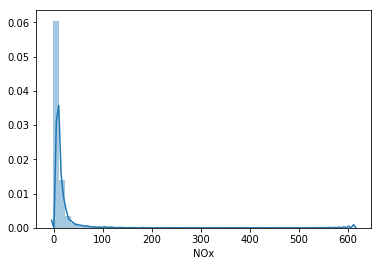

In [4]:
sns.distplot(data2['NOx'])

In [8]:
mean=(data2['NOx'].mean())
var =(data2['NOx'].var())

data2['NOx'].describe()

count    8699.000000
mean       10.624509
std        18.924126
min        -0.800000
25%         2.650000
50%         5.900000
75%        11.700000
max       612.500000
Name: NOx, dtype: float64

The inverse gamma distribution (also called the inverted gamma distribution) is the reciprocal of the gamma distribution. It has two positive parameters (α and β):
The shape parameter α controls the height. The higher the alpha, the taller the probability density function (PDF); higher values for the shape parameter will also result in thinner tails.
The scale parameter β controls the spread.
The shorthand for the distribution, X~inverted gamma(α,β), or IG(α, β), means that a random variable X has this distribution with positive parameters α and β.


The generalized inverse gamma distribution has two additional parameters:
The mean, μ. This is always zero in the two-parameter version.
γ, which controls the concentration near the x-axis. This is always set to 1 in the two-parameter version.
The distribution spreads over the interval μ to &infinity;. As values for x increase, the function decreases 
https://www.statisticshowto.datasciencecentral.com/inverse-gamma-distribution/

In [ ]:
sns.distplot(data2['NO'])

In [ ]:
sns.distplot(data2['NO2'])

In [ ]:
import math

mean=(data2['NO2'].mean())
var =(data2['NO2'].var())
scale=(var/mean)
shape=(mean*mean)/var # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 8699)
#s = np.random.poisson(7.85, size=8699)
sns.distplot(s)


# Reference
Nitrogen oxides includes the two pollutants nitric oxide (NO) and nitrogen dioxide (NO2). Power-generation plants and motor vehicles are the principal sources of NOx, through high temperature combustion. NOx contributes to the formation of acid rain and is also a recognised ozone precursor. 

Short-term exposure to NO2 is associated with reduced lung function and airway responsiveness, and increased reactivity to natural allergens. Long-term exposure is associated with increased risk of respiratory infection in children. 
CAFE Directive 2008/50/EC established an hourly limit of 200 μg/m3 and an annual mean limit of 40 μg/m3 in respect of NO2. No more than 18 exceedances of the hourly limit values are allowed per year. Both limit values come into force on 1 January 2010.
Supplementary Information
Oxides of Nitrogen- this pollutant is measured using an API M200 NOx analyser. Both nitrogen dioxide and nitrogen monoxide are measured by Chemiluminescence, which, in this case, is the emission of light during the reaction of NO with Ozone. 
Air is sampled, through a filter, into a reaction chamber in the analyser. Here it is mixed with Ozone and the emitted radiation is measured to give the number of NO molecules. To determine the NO2 concentration, sampled air is fed through a converter to reduce the NO2 to NO and measured as above. The signal given off is the concentration of NO2 plus NO. By then taking away the concentration of NO from this, you get the NO2 concentration. 
1. EPA,   "EPA Ireland Archive of Nitrogen Oxides Monitoring Data". Associated datasets and digitial information objects connected to this resource are available at: Secure Archive For Environmental Research Data (SAFER) managed by Environmental Protection Agency Ireland http://erc.epa.ie/safer/resource?id=216a8992-76e5-102b-aa08-55a7497570d3 (Last Accessed: 2019-12-02)